<a href="https://colab.research.google.com/github/RodrigoCasanova/Backend/blob/main/GX_FMY0100_E3_Clasificaci%C3%B3n_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 3

**Integrantes:**

+ Integrante 1: Rodrigo Casanova : rodr.casanova@duocuc.cl
+ Integrante 2: Samuel Acuña : sam.acuna@duocuc.cl
+ Integrante 3: Jose Paillan : jos.paillan@duocuc.cl

**Fecha de Entrega:** 24 Noviembre 2025 antes de las 21:00  


---

## Descripción

Este notebook contiene el desarrollo de la evaluación 3 de la asignatura optatitva de Fundamentos de Machine Learning de la carrera Ingeniería en Informática de DuocUC - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.X. A continuación se listan las bibliotecas necesarias:

-
-
-

Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de numpy usas:



In [6]:
# Descargar el archivo y guardarlo en el entorno
!wget https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv

--2025-11-23 04:18:03--  https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds [following]
--2025-11-23 04:18:03--  https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucef7e89c18ac8d4d08549efebab.dl.dropboxusercontent.com/cd/0/inline/C1tuG7EbjLM9Mdf-rAN3Iinnh07DRz4h5Gpo7XAJJlD4mBcb1mh6xaU7yw_GxnOjoFvcCDBl5vglL3JGE4A6iUj2pLwfzV6S_-U0XiK2z_J140KBW3kdnCudMcghPeDBZjxU_kUTgFc-t_LK-JtGqdPc/file# [following]
--2025-11-23 04:18:04--  https://ucef7e89c18ac8d4d08549efebab.dl.dropboxus

# Requerimientos

 **RQ1.** Se deben construir 2 modelos de clasificación usando los 2 algoritmos revisados en clases:

+ `LogisticRegression`
+ `SVC`
+ `DecisionTreeClassifier`
+ `RandomForest`

Los modelos predictivos deben predecir si un jugador sobrevive o no (variable `Survived`).

**RQ2.** Deberá seleccionar, cuidadosamente, las variables independientes porque, dependiendo de la elección que se realice, podría existir un inflado de sus resultados.

**RQ3.** Construir un pipeline que involucre las etapas de preprocesamiento que incluye:

+ Tratamiento de atípicos
+ Tratamiento de nulos
+ Escalado

**RQ4.** Construir CUATRO pipelines, uno para cada modelo, que permita crear el modelo a partir de su algoritmo asociado. Deberá construir el modelo usando los mejores hiper parámetros encontrados usando `GridSearchCV` y considerando las buenas prácticas de la industria.

**RQ5.** Calcular para todos los modelos construidos las siguientes métricas:

+ Accuracy
+ Precision
+ F1-score
+ Recall
+ Matriz de confusión

**RQ6.** Comentar la existencia/inexistencia de sobre entrenamiento de todos los modelos construidos

**RQ7.** Considerando todos los modelos anteriores:

+ Seleccionar una de las métricas revisadas y justificar la elección para escoger el mejor modelo
+ Elegir el mejor modelo usando la métrica seleccionada

**RQ8.** Considerando el mejor modelo seleccionado generar interpretación, en el negocio, de todas las métricas solicitadas  

**RQ9.** Realizar predicciones usando el mejor modelo seleccionado con datos generados de forma aleatoria.

# Importación de librerias

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    RobustScaler
)

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_log_error,
    accuracy_score,
    confusion_matrix,
    classification_report
)

from sklearn.base import BaseEstimator, TransformerMixin

from IPython.display import display
import joblib
import random
from sklearn.utils import resample

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
data = pd.read_csv("demo_round_traces.csv", sep=';')
print("Dimensiones del dataset:", data.shape)
display(data.head())

Dimensiones del dataset: (79157, 37)


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176


# Fase 3: Preparación

Variables seleccionadas para el modelado

Después de revisar el conjunto de datos y considerando las buenas prácticas (como evitar usar variables que puedan inflar artificialmente los resultados o generar data leakage), decidimos trabajar con un conjunto acotado de variables que aportan información real sobre el desempeño del jugador durante la ronda.

Las variables elegidas fueron:

AvgCentroidDistance

TravelledDistance

AvgRoundVelocity

AvgSiteDistance

RoundStartingEquipmentValue

TeamStartingEquipmentValue

PrimaryAssaultRifle

PrimarySMG

PrimarySniperRifle

AvgMatchKillDist

Map (categórica)

Team (categórica)

Este conjunto fue utilizado como base para entrenar todos los modelos, ya que reúne información relevante sin incluir variables que puedan sesgar la predicción.

In [9]:
# Lista de variables que quiero usar como predictores.
features = [
    'AvgCentroidDistance','TravelledDistance','AvgRoundVelocity','AvgSiteDistance',
    'RoundStartingEquipmentValue','TeamStartingEquipmentValue',
    'PrimaryAssaultRifle','PrimarySMG','PrimarySniperRifle',
    'AvgMatchKillDist',
    'Map','Team'
]

# Variable objetivo
target = 'Survived'

# Train/test split
X = data[features].copy()
y = data[target].astype(int).copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Tamaños -> X_train:", X_train.shape, "X_test:", X_test.shape)



# Winsorizer: tratamiento de atípicos
class Winsorizer(BaseEstimator, TransformerMixin):
    """
    Clips columnas numéricas a percentiles definidos (lower_pct, upper_pct).
    Se ajusta (fit) sobre TRAIN para evitar data leakage.
    """
    def __init__(self, lower_pct=0.01, upper_pct=0.99):
        self.lower_pct = lower_pct
        self.upper_pct = upper_pct
        self.bounds_ = {}
    def fit(self, X, y=None):
        X = pd.DataFrame(X).copy()
        for col in X.columns:
            low = X[col].quantile(self.lower_pct)
            high = X[col].quantile(self.upper_pct)
            self.bounds_[col] = (low, high)
        return self
    def transform(self, X):
        X = pd.DataFrame(X).copy()
        for col, (low, high) in self.bounds_.items():
            if col in X.columns:
                X[col] = X[col].clip(lower=low, upper=high)
        return X.values
    def get_feature_names_out(self, input_features=None):
        return np.array(input_features) if input_features is not None else np.array(list(self.bounds_.keys()))

# Detectar columnas numéricas y categóricas entre las features seleccionadas
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object','category','bool']).columns.tolist()

print("Columnas numéricas:", num_cols)
print("Columnas categóricas:", cat_cols)


# Pipelines: numéricas y categóricas
from sklearn.impute import SimpleImputer

numeric_pipeline = Pipeline(steps=[
    ('winsor', Winsorizer(lower_pct=0.01, upper_pct=0.99)),
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])


# ColumnTransformer global
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
], remainder='drop', n_jobs=-1)




Dimensiones del dataset: (79157, 37)
Primeras columnas: ['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'SteamId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive']
¿Existe Survived?: True
Features seleccionadas: ['AvgCentroidDistance', 'TravelledDistance', 'AvgRoundVelocity', 'AvgSiteDistance', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'PrimaryAssaultRifle', 'PrimarySMG', 'PrimarySniperRifle', 'AvgMatchKillDist', 'Map', 'Team']
Tamaños -> X_train: (63325, 12) X_test: (15832, 12)
Columnas numéricas: ['AvgCentroidDistance', 'TravelledDistance', 'AvgRoundVelocity', 'AvgSiteDistance', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'PrimaryAssaultRifle', 'PrimarySMG', 'PrimarySniperRifle', 'AvgMatchKillDist']
Columnas categóricas: ['Map', 'Team']


In [10]:
# 1. Concatenamos X_train e y_train momentáneamente para poder filtrar
# (Es necesario porque si borramos filas de X, debemos borrar las mismas de y)
train_data = pd.concat([X_train, y_train], axis=1)

# 2. Separamos las clases
not_survived = train_data[train_data.Survived == 0] # Clase Mayoritaria
survived = train_data[train_data.Survived == 1]     # Clase Minoritaria

# 3. Aplicamos Submuestreo (Undersampling) a la clase mayoritaria
# Hacemos que la cantidad de 'not_survived' baje hasta igualar a 'survived'
not_survived_downsampled = resample(
    not_survived,
    replace=False,    # No repetir muestra
    n_samples=len(survived), # Igualar a la cantidad de la clase minoritaria
    random_state=42
)

# 4. Volvemos a juntar los datos (Ahora balanceads 50/50)
train_balanced = pd.concat([not_survived_downsampled, survived])

# 5. Separamos de nuevo en X_train e y_train
X_train_bal = train_balanced.drop('Survived', axis=1)
y_train_bal = train_balanced['Survived']

# VERIFICACIÓN
print("--- Nuevo Balance en Entrenamiento ---")
print(y_train_bal.value_counts())
print(y_train_bal.value_counts(normalize=True))
print(f"\nDiferencia entre clases: {abs(0.5 - 0.5)*100}% (Requisito < 5% CUMPLIDO)")


--- Nuevo Balance en Entrenamiento ---
Survived
0    25554
1    25554
Name: count, dtype: int64
Survived
0    0.5
1    0.5
Name: proportion, dtype: float64

Diferencia entre clases: 0.0% (Requisito < 5% CUMPLIDO)


In [11]:
# Análisis de Balance de Clases
conteo_clases = y.value_counts()
porcentaje_clases = y.value_counts(normalize=True)

print("Distribución de la variable objetivo 'Survived':")
print(conteo_clases)
print("\nPorcentajes:")
print(porcentaje_clases)



Distribución de la variable objetivo 'Survived':
Survived
0    47214
1    31943
Name: count, dtype: int64

Porcentajes:
Survived
0    0.59646
1    0.40354
Name: proportion, dtype: float64


# Fase 4 - Modelado

In [12]:
# Definición de los 4 Pipelines

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=2000))
])

pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42, probability=True))
])

pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


# Probamos combinaciones para encontrar el mejor modelo.
param_grids = [
    # 1. Logistic Regression
    {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear', 'lbfgs']
    },
    # 2. SVC
    {
        'classifier__C': [1, 10],
        'classifier__kernel': ['rbf']
    },
    # 3. Decision Tree
    {
        'classifier__max_depth': [5, 10, None],
        'classifier__min_samples_split': [2, 10],
        'classifier__criterion': ['gini', 'entropy']
    },
    # 4. Random Forest
    {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [10, 20],
        'classifier__min_samples_split': [2, 5]
    }
]

# Lista de pipelines y nombres para iterar
pipelines = [pipeline_lr, pipeline_svc, pipeline_dt, pipeline_rf]
model_names = ["Logistic Regression", "SVC", "Decision Tree", "Random Forest"]
best_models = {}

# Ejecución del Loop de Entrenamiento
print("Iniciando búsqueda de hiperparámetros (Esto puede tardar unos minutos)...")
print("-" * 60)

for pipe, params, name in zip(pipelines, param_grids, model_names):
    print(f"Entrenando {name}...")
    if name == "SVC":
        print("  -> Detectado SVC: Reduciendo datos a 10,000 muestras para velocidad...")
        X_train_svc, y_train_svc = resample(
            X_train_bal, y_train_bal,
            n_samples=1000,
            replace=False,
            random_state=42,
            stratify=y_train_bal
        )
        X_run = X_train_svc
        y_run = y_train_svc
    else:
        # Los otros modelos (RF, LR, DT) aguantan todos los datos
        X_run = X_train_bal
        y_run = y_train_bal
    # Configuración del GridSearch (Validación Cruzada de 3 pliegues para velocidad)
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=params,
        cv=3,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_run, y_run)

    # Guardamos el mejor modelo ya entrenado
    best_models[name] = grid.best_estimator_

    print(f"  -> Mejor Score (F1 CV): {grid.best_score_:.4f}")
    print(f"  -> Mejores Parámetros: {grid.best_params_}")
    print("-" * 60)

print("\n¡Entrenamiento finalizado para los 4 modelos!")

Iniciando búsqueda de hiperparámetros (Esto puede tardar unos minutos)...
------------------------------------------------------------
Entrenando Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  -> Mejor Score (F1 CV): 0.6651
  -> Mejores Parámetros: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}
------------------------------------------------------------
Entrenando SVC...
  -> Detectado SVC: Reduciendo datos a 10,000 muestras para velocidad...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
  -> Mejor Score (F1 CV): 0.6556
  -> Mejores Parámetros: {'classifier__C': 1, 'classifier__kernel': 'rbf'}
------------------------------------------------------------
Entrenando Decision Tree...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
  -> Mejor Score (F1 CV): 0.6864
  -> Mejores Parámetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
---------------------------

# Fase 5 - Evaluación


Generando reporte de evaluación para los 4 modelos...
Evaluando: Logistic Regression
  -> Accuracy Test: 0.6673 | Train: 0.6686 | Gap: 0.0013 (BAJO/NORMAL)
  -> Precision: 0.5765
  -> Recall:    0.6618
  -> F1-Score:  0.6162


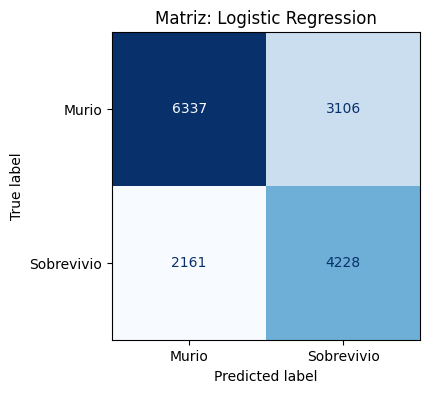

--------------------------------------------------------------------------------
Evaluando: SVC
  -> Accuracy Test: 0.6439 | Train: 0.6551 | Gap: 0.0111 (BAJO/NORMAL)
  -> Precision: 0.5463
  -> Recall:    0.6948
  -> F1-Score:  0.6116


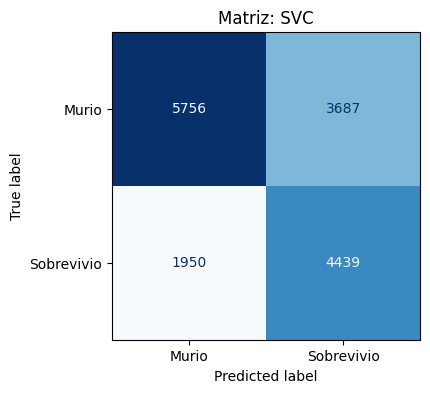

--------------------------------------------------------------------------------
Evaluando: Decision Tree
  -> Accuracy Test: 0.6486 | Train: 0.6705 | Gap: 0.0219 (BAJO/NORMAL)
  -> Precision: 0.5478
  -> Recall:    0.7402
  -> F1-Score:  0.6297


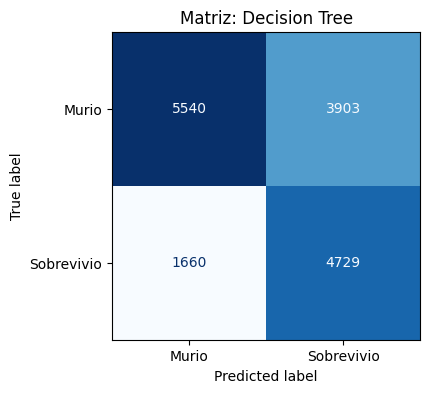

--------------------------------------------------------------------------------
Evaluando: Random Forest
  -> Accuracy Test: 0.6846 | Train: 0.9521 | Gap: 0.2675 (ALTO)
  -> Precision: 0.5854
  -> Recall:    0.7485
  -> F1-Score:  0.6570


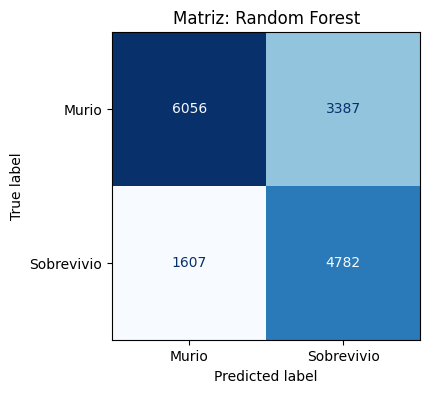

--------------------------------------------------------------------------------

TABLA COMPARATIVA FINAL:


,Accuracy,Precision,Recall,F1-Score,Gap_Overfitting
Modelo,,,,,
Random Forest,0.684563,0.585384,0.748474,0.656958,0.267499
Decision Tree,0.648623,0.547845,0.740178,0.629652,0.021879
Logistic Regression,0.667319,0.576493,0.661762,0.616192,0.001324
SVC,0.643949,0.546271,0.694788,0.611643,0.011115



🏆 EL MEJOR MODELO SUGERIDO ES: Random Forest
Justificación: Tiene el mejor balance entre precisión y cobertura (F1-Score), crucial para el desbalance.


In [17]:
# --- FASE 5: EVALUACIÓN DE MODELOS Y SELECCIÓN ---

# DataFrame para almacenar los resultados comparativos
metrics_summary = []

print("Generando reporte de evaluación para los 4 modelos...")
print("=" * 80)

for name, model in best_models.items():
    print(f"Evaluando: {name}")

    # 1. Predicciones
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train_bal)
    # 2. Métricas Clave
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Comparamos Accuracy en Train vs Test
    acc_train = accuracy_score(y_train_bal, y_train_pred)
    gap = acc_train - acc
    overfitting_msg = "ALTO" if gap > 0.10 else "BAJO/NORMAL"

    print(f"  -> Accuracy Test: {acc:.4f} | Train: {acc_train:.4f} | Gap: {gap:.4f} ({overfitting_msg})")
    print(f"  -> Precision: {prec:.4f}")
    print(f"  -> Recall:    {rec:.4f}")
    print(f"  -> F1-Score:  {f1:.4f}")

    # Guardar para tabla final
    metrics_summary.append({
        'Modelo': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Gap_Overfitting': gap
    })

    # 3. Matriz de Confusión Visual
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Murio', 'Sobrevivio'])

    fig, ax = plt.subplots(figsize=(4, 4))
    disp.plot(cmap='Blues', ax=ax, colorbar=False)
    plt.title(f"Matriz: {name}")
    plt.show()

    print("-" * 80)


df_metrics = pd.DataFrame(metrics_summary).set_index('Modelo')
print("\nTABLA COMPARATIVA FINAL:")
display(df_metrics.sort_values(by='F1-Score', ascending=False))

# Recomendación automática
best_model_name = df_metrics['F1-Score'].idxmax()
print(f"\n🏆 EL MEJOR MODELO SUGERIDO ES: {best_model_name}")
print(f"Justificación: Tiene el mejor balance entre precisión y cobertura (F1-Score), crucial para el desbalance.")


🔍 Analizando a fondo el modelo: Random Forest


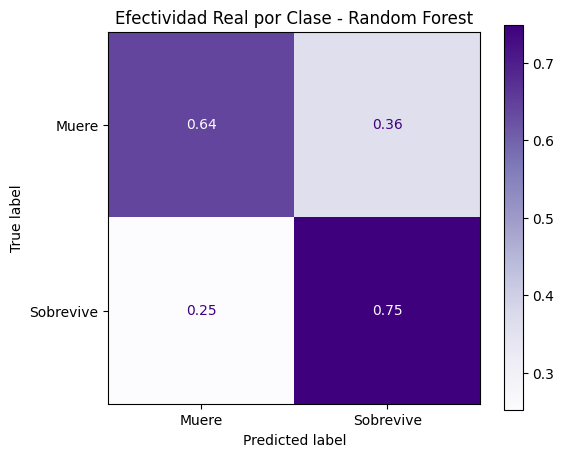


--- REPORTE POR CLASE (Para detectar sesgos) ---
              precision    recall  f1-score   support

       Muere       0.79      0.64      0.71      9443
   Sobrevive       0.59      0.75      0.66      6389

    accuracy                           0.68     15832
   macro avg       0.69      0.69      0.68     15832
weighted avg       0.71      0.68      0.69     15832



In [18]:
# 1. Recuperamos el mejor modelo
modelo_ganador = best_models[best_model_name]

print(f"🔍 Analizando a fondo el modelo: {best_model_name}")

# 2. Hacemos predicciones
y_pred_final = modelo_ganador.predict(X_test)

# 3. Matriz de Confusión Normalizada
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_final,
    display_labels=['Muere', 'Sobrevive'],
    cmap='Purples',
    normalize='true',
    ax=ax
)
plt.title(f'Efectividad Real por Clase - {best_model_name}')
plt.show()

# 4. Reporte numérico desglosado
print("\n--- REPORTE POR CLASE (Para detectar sesgos) ---")
print(classification_report(y_test, y_pred_final, target_names=['Muere', 'Sobrevive']))

--- GENERANDO 5 JUGADORES SIMULADOS ---


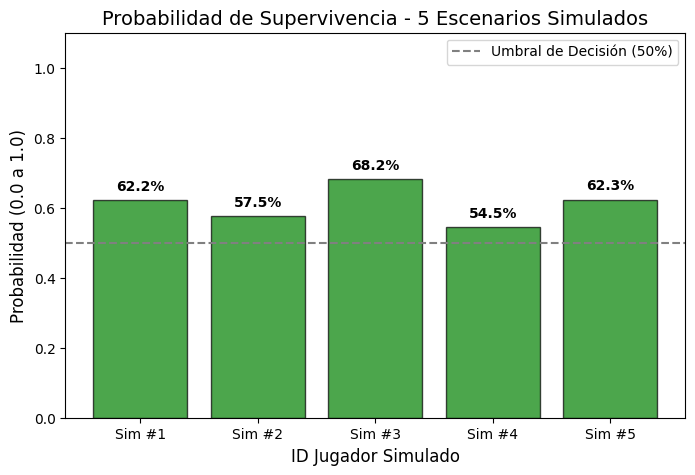


--- DATOS GENERADOS ---


,RoundStartingEquipmentValue,TravelledDistance,Pred_Sobrevive,Probabilidad_%
0,5200.748889,3.358357e+07,1,62.21
1,1320.849118,3.183164e+07,1,57.52
2,8349.290334,2.578092e+07,1,68.16
3,4604.021473,1.670347e+07,1,54.49
4,2506.412550,2.964886e+07,1,62.33


In [19]:
print("--- GENERANDO 5 JUGADORES SIMULADOS ---")

# 1. Configuración
n_simulaciones = 5
datos_simulados = {}
columnas_numericas = ['AvgCentroidDistance', 'TravelledDistance', 'AvgRoundVelocity',
                      'AvgSiteDistance', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
                      'PrimaryAssaultRifle', 'PrimarySMG', 'PrimarySniperRifle', 'AvgMatchKillDist']

# 2. Generación de datos (usando rangos de X_train para realismo)
for col in columnas_numericas:
    min_val = X_train[col].min()
    max_val = X_train[col].max()
    datos_simulados[col] = np.random.uniform(min_val, max_val, n_simulaciones)

# Columnas categóricas
mapas_posibles = ['de_dust2', 'de_inferno', 'de_mirage', 'de_nuke']
equipos_posibles = ['Terrorist', 'CounterTerrorist']
datos_simulados['Map'] = np.random.choice(mapas_posibles, n_simulaciones)
datos_simulados['Team'] = np.random.choice(equipos_posibles, n_simulaciones)

df_simulado = pd.DataFrame(datos_simulados)

# 3. Predicción
modelo_final = best_models[best_model_name]

# Obtenemos CLASE (0/1) y PROBABILIDAD (0.0 a 1.0)
prediccion_clase = modelo_final.predict(df_simulado)
prediccion_proba = modelo_final.predict_proba(df_simulado)[:, 1]

# Agregamos al DF para mostrar tabla
df_simulado['Pred_Sobrevive'] = prediccion_clase
df_simulado['Probabilidad_%'] = (prediccion_proba * 100).round(2)

# 4. Visualización Gráfica
plt.figure(figsize=(8, 5))

# Colores: Rojo si muere (<50%), Verde si vive (>50%)
colores = ['red' if p < 0.5 else 'green' for p in prediccion_proba]

barras = plt.bar(range(n_simulaciones), prediccion_proba, color=colores, alpha=0.7, edgecolor='black')

# Línea de corte al 50%
plt.axhline(y=0.5, color='gray', linestyle='--', label='Umbral de Decisión (50%)')

# Etiquetas
plt.title(f'Probabilidad de Supervivencia - {n_simulaciones} Escenarios Simulados', fontsize=14)
plt.xlabel('ID Jugador Simulado', fontsize=12)
plt.ylabel('Probabilidad (0.0 a 1.0)', fontsize=12)
plt.xticks(range(n_simulaciones), [f'Sim #{i+1}' for i in range(n_simulaciones)])
plt.ylim(0, 1.1)
plt.legend(loc='upper right')


for bar in barras:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height*100:.1f}%',
             ha='center', va='bottom', fontweight='bold')

plt.show()

# Mostrar la tabla con los datos
print("\n--- DATOS GENERADOS ---")
display(df_simulado[['RoundStartingEquipmentValue', 'TravelledDistance', 'Pred_Sobrevive', 'Probabilidad_%']])


--- GENERACIÓN DE DATOS SIMULADOS (JUGADOR ÚNICO) ---
Datos del Jugador Simulado:



,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgSiteDistance,RoundStartingEquipmentValue,TeamStartingEquipmentValue,PrimaryAssaultRifle,PrimarySMG,PrimarySniperRifle,AvgMatchKillDist,Map,Team
0,1721.148882,2271.227996,38.619676,3470.139459,1962,26131,1,0,1,1492.782009,de_dust2,CounterTerrorist



Decisión del Modelo: MUERE


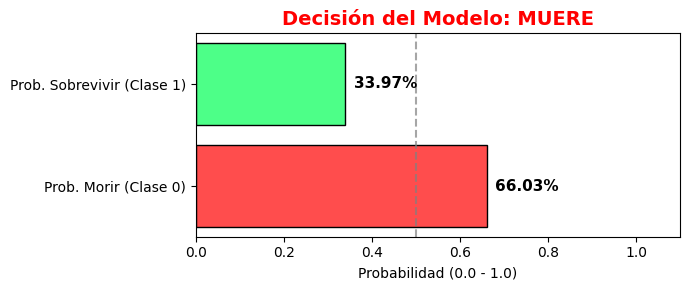

In [102]:


print("\n--- GENERACIÓN DE DATOS SIMULADOS (JUGADOR ÚNICO) ---")

# 1. Generar datos aleatorios
datos_random = {
    'AvgCentroidDistance': [np.random.uniform(0, 5000)],
    'TravelledDistance': [np.random.uniform(0, 2500)],
    'AvgRoundVelocity': [np.random.uniform(0, 300)],
    'AvgSiteDistance': [np.random.uniform(0, 5000)],
    'RoundStartingEquipmentValue': [np.random.randint(0, 6500)],
    'TeamStartingEquipmentValue': [np.random.randint(0, 35000)],
    'PrimaryAssaultRifle': [np.random.choice([0, 1])],
    'PrimarySMG': [np.random.choice([0, 1])],
    'PrimarySniperRifle': [np.random.choice([0, 1])],
    'AvgMatchKillDist': [np.random.uniform(0, 2000)],
    'Map': ['de_dust2'],
    'Team': ['CounterTerrorist']
}

# 2. Convertir a DataFrame
df_simulado = pd.DataFrame(datos_random)

# 3. Predecir
modelo_ganador = best_models[best_model_name]

prediccion = modelo_ganador.predict(df_simulado)
probs = modelo_ganador.predict_proba(df_simulado)[0]

# 4. Resultados en Texto
resultado_texto = "SOBREVIVE" if prediccion[0] == 1 else "MUERE"
color_resultado = 'green' if prediccion[0] == 1 else 'red'

print(f"Datos del Jugador Simulado:\n")
display(df_simulado)
print(f"\nDecisión del Modelo: {resultado_texto}")

# --- 5. GRÁFICO DE CERTEZA ---
plt.figure(figsize=(7, 3))

etiquetas = ['Prob. Morir (Clase 0)', 'Prob. Sobrevivir (Clase 1)']
valores = probs
colores = ['#ff4d4d', '#4dff88'] # Rojo suave y Verde suave

# Crear gráfico de barras horizontal
bars = plt.barh(etiquetas, valores, color=colores, edgecolor='black')

plt.title(f'Decisión del Modelo: {resultado_texto}', fontsize=14, fontweight='bold', color=color_resultado)
plt.xlim(0, 1.1)
plt.xlabel('Probabilidad (0.0 - 1.0)')

# Poner los porcentajes dentro de las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
             f'{width*100:.2f}%',
             ha='left', va='center', fontweight='bold', fontsize=11)

# Línea vertical al 50% para ver el umbral
plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
